<a href="https://colab.research.google.com/github/Erickrus/llm/blob/main/rejection_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rejection Sampling


In [ ]:
#@title **setup**

#@markdown $\tilde{P}(X)$ is the unnormalized density, we divide by $Z$, give us a normalized density $\frac{\tilde{P}(X)}{Z}$, that is $P(X)$
#@markdown
#@markdown The idea is normalised density function sum up to 1:
#@markdown $\int^{\infty}_{-\infty}P(x)dx=1$
#@markdown
#@markdown But unnormalized density function doesnt sum up to 1:
#@markdown
#@markdown given: $\frac{\tilde{P}(X)}{Z}$, but that's what we are given.
#@markdown

In [ ]:
#@title **goal**
#@markdown
#@markdown The goal is choosing a `proposal distribution`: $q(X)$. Essentially, $q(X)$ is another distribution, like an envelope over this original distribution $\tilde{P}(X)$. The $q(X)$ should cover the original desired distribution. If we cannot sample from the original distribution, then we can sample from $q(X)$. And follow the procedure get sampled from the original $P(X)$
#@markdown
#@markdown The condition is: $M$ is a constant, $M \cdot q(X) \ge \tilde{P}(X)$.

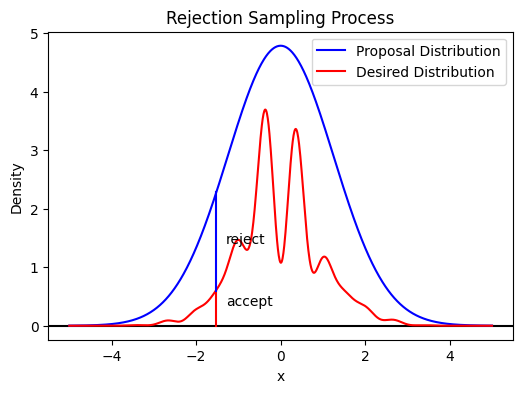

In [ ]:
#@title **process**


#@markdown
#@markdown $x \sim q(X) $, sample $x$ values from $q(X)$ distribution. `desire density` in <font color=red>red</font> and `proposal density` in <font color=blue>blue</font>. proposal density is over and covers the desired density.
#@markdown
#@markdown Let's choose one point,
#@markdown
#@markdown $u \sim U([0,1])$
#@markdown
#@markdown we also sample a $u$ value from a uniform distribution $U$, between 0 and 1. If the $u$ above the $q$ and then we reject $x$, otherwise we accept $x$.
#@markdown
#@markdown The probablity of acceptance will be $\frac{\tilde{P}(X)}{M \cdot q(X)}$
#@markdown
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the desired distribution (e.g., standard normal distribution)
desired_distribution = lambda x: np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4 * x)**2 + 1)


# Define the proposal distribution (e.g., normal distribution with larger variance)
proposal_distribution = lambda x: norm.pdf(x, loc=0, scale=1.25) * 15.0

# Generate x values
x = np.linspace(-5, 5, 1000)

# Calculate the y values for both distributions
desired_y = desired_distribution(x)
proposal_y = proposal_distribution(x)


fig, ax = plt.subplots(figsize=(6, 4))
ax.axhline(y=0, color='k')

# Plot the distributions
plt.plot(x, proposal_y, label='Proposal Distribution', color='blue')
plt.plot(x, desired_y, label='Desired Distribution', color='red')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Process')
plt.legend()


plt.plot((-1.52, -1.52), (0., 0.6), c = 'red')
plt.plot((-1.52, -1.52), (0.6, 2.28), c = 'blue')
plt.text(-1.3, 0.35, 'accept')
plt.text(-1.3, 1.4, 'reject')

# Show the plot
plt.show()



**statistics**

definition of conditional probability

- $P(A\mid B)= \frac{P(B)}{P(A,B)}$ is known as the definition of conditional probability

probablity vs integral conversion

- general approach of converting probablity to an integral is like:

- $P(A)=\int^{\infty}_{-\infty} P(A∣X=x){PDF}_X(x)dx$

PDF and CDF

- Probability Density Function (PDF), denoted as $f$
  - it is $f(x)$, in following formula, which is the curve
  - $P(a \leq X \leq b) = \int^{b}_{a} f(x)dx $

- Cumulative Distribution Function (CDF)
  - $F(x)=P(X\leq x) = \int^{x}_{-\infty}f(t)dt $
  - accumulate from $-\infty$ to $x$, which means the area of the curve

**prove**
$$\require{cancel}$$

$P(X \leq x | U \leq \frac{\tilde{P}(X)}{M\cdot q(X)} ) = CDF_P(X)$



$= \frac{P(X \leq x, U \leq \frac{\tilde{P}(X)}{M\cdot q(X)})}{P(U\leq \frac{\tilde{P}(X)}{M\cdot q(X)})} = \frac {\mathrm{I}}{\mathrm{II}}$

Let $\mathrm{I} = P(X \leq x, U \leq \frac{\tilde{P}(X)}{M\cdot q(X)})$ ,
and
$\mathrm{II}=P(U \leq \frac{\tilde{P}(X)}{M\cdot q(X)})$



$\mathrm{II}=P(U \leq \frac{\tilde{P}(X)}{M\cdot q(X)})=\int^{\infty}_{-\infty} P(U \leq \frac{\tilde{P}(x)}{M\cdot q(x)}, X=x)dx $

$=\int^{\infty}_{-\infty} P(U \leq \frac{\tilde{P}(x)}{M\cdot q(x)}| X=x) PDF_X(x) dx $




$=\int^{\infty}_{-\infty} \frac{\tilde{P}(x)}{M\cdot \cancel{q(x)}} \cancel{q(x)} dx $

$=\frac{1}{M}\int^{\infty}_{-\infty} \tilde{P}(x) dx $


$\mathrm{I} = P(X \leq x, U \leq \frac{\tilde{P}(X)}{M\cdot q(X)}) = \int^{x}_{-\infty} P(X=x, U \leq \frac{\tilde{P}(x)}{M\cdot q(x)} )dx$

$=\frac{1}{M}\int^{x}_{-\infty} \tilde{P}(x) dx $

$\frac{\mathrm{I}}{\mathrm{II}}=\frac{\frac{1}{M}\int^{x}_{-\infty} \tilde{P}(x) dx}{\frac{1}{M}\int^{\infty}_{-\infty} \tilde{P}(x) dx}$

$=\frac{\frac{1}{\cancel{M}}\int^{x}_{-\infty} \tilde{P}(x) dx}{\frac{1}{\cancel{M}}\int^{\infty}_{-\infty} \tilde{P}(x) dx}$

$=\int^{x}_{-\infty} \frac{\tilde{P}(x)}{Z} dx$

$=CDF_P(X)$

In [ ]:
#@title Rejection Sampling Process
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime

#@markdown **setup**

print(datetime.datetime.now())

scale = 1.25
M = 15.0
num_samples = 10000




#@markdown desired distribution $e^{-\frac{x^2}{2}} \left( \sin^2(6 + x) + 3 \cos^2(x) \sin^2(4x) + 1 \right)$

desired_distribution = lambda x: np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4 * x)**2 + 1)

#@markdown proposal distribution $ M \cdot \frac{1}{\sqrt{2 \pi \, \text{scale}^2}} \exp\left(-\frac{x^2}{2 \cdot \text{scale}^2}\right)$
proposal_distribution = lambda x: norm.pdf(x, loc=0, scale=scale) * M


#@markdown **process**
# Generate x values for plotting
x = np.linspace(-5, 5, 1000)

# Calculate the y values for both distributions
desired_y = desired_distribution(x)
proposal_y = proposal_distribution(x)

# Rejection sampling
def rejection_sampling(desired_dist, proposal_dist, M, num_samples):
    samples = []
    #@markdown loop until the number of accepted samples in samples reaches num_samples
    while len(samples) < num_samples:
        #@markdown - Generates a sample $x\_proposal$ from the proposal distribution.
        #@markdown   Here, np.random.normal(0, scale) generates a random sample
        #@markdown   from a normal distribution with mean 0 and standard deviation scale.
        x_proposal = np.random.normal(0, scale)
        #@markdown - Generates a uniform random number $u$ between 0 and
        #@markdown   $M × proposal\_dist(x\_proposal)$. This u is used to decide
        #@markdown   whether to accept or reject the proposed sample.
        u = np.random.uniform(0, M * proposal_dist(x_proposal))
        #@markdown - checks if the uniform random number $u$ is less than or equal to
        #@markdown   the value of the desired distribution evaluated at $x\_proposal$.
        #@markdown   This condition ensures that the proposed sample $x\_proposal$ is accepted
        #@markdown   with a probability proportional to the desired distribution.
        if u <= desired_dist(x_proposal):
            samples.append(x_proposal)
    return np.array(samples)

print("rejection_sampling() ... ")
samples = rejection_sampling(desired_distribution, proposal_distribution, M, num_samples)
print(datetime.datetime.now())

2024-08-12 03:49:10.122486
rejection_sampling() ... 
2024-08-12 03:50:40.586563


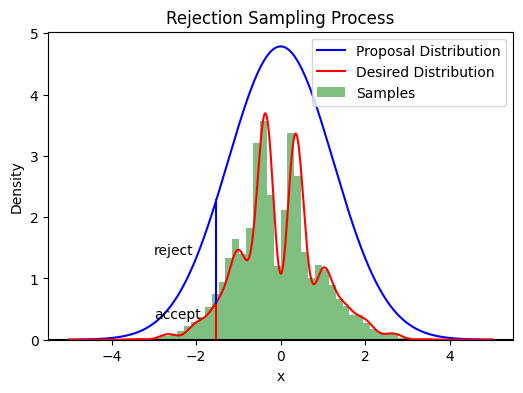

In [ ]:
#@title visualize
# Plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))
ax.axhline(y=0, color='k')
plt.plot(x, proposal_y, label='Proposal Distribution', color='blue')
plt.plot(x, desired_y, label='Desired Distribution', color='red')
#plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples', color='green')


# Calculate histogram data
counts, bins = np.histogram(samples, bins=50, density=True)
counts *= 6.  # Scale the counts by a factor of 6

# Plot the histogram with scaled height
plt.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5, label='Samples', color='green')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling Process')
plt.legend()

plt.plot((-1.52, -1.52), (0., 0.6), c = 'red')
plt.plot((-1.52, -1.52), (0.6, 2.28), c = 'blue')
plt.text(-3, 0.35, 'accept')
plt.text(-3, 1.4, 'reject')


# Show the plot
plt.show()